In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.base import BaseEstimator,TransformerMixin

In [4]:
data=pd.read_csv("data/Crop_Recommendation.csv")
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorus,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
Temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
Humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
pH_Value,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
Rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [6]:
for col in data:
    print(f"number of every item in---> {data[col].value_counts()}")
    print("*"*50)

number of every item in---> 22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: Nitrogen, Length: 137, dtype: int64
**************************************************
number of every item in---> 60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: Phosphorus, Length: 117, dtype: int64
**************************************************
number of every item in---> 17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: Potassium, Length: 73, dtype: int64
**************************************************
number of every item in---> 20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: Temperature, Length: 2200, dtype: int64
**************************************************
number of every item in---> 82.002744

Text(0, 0.5, 'Rainfall')

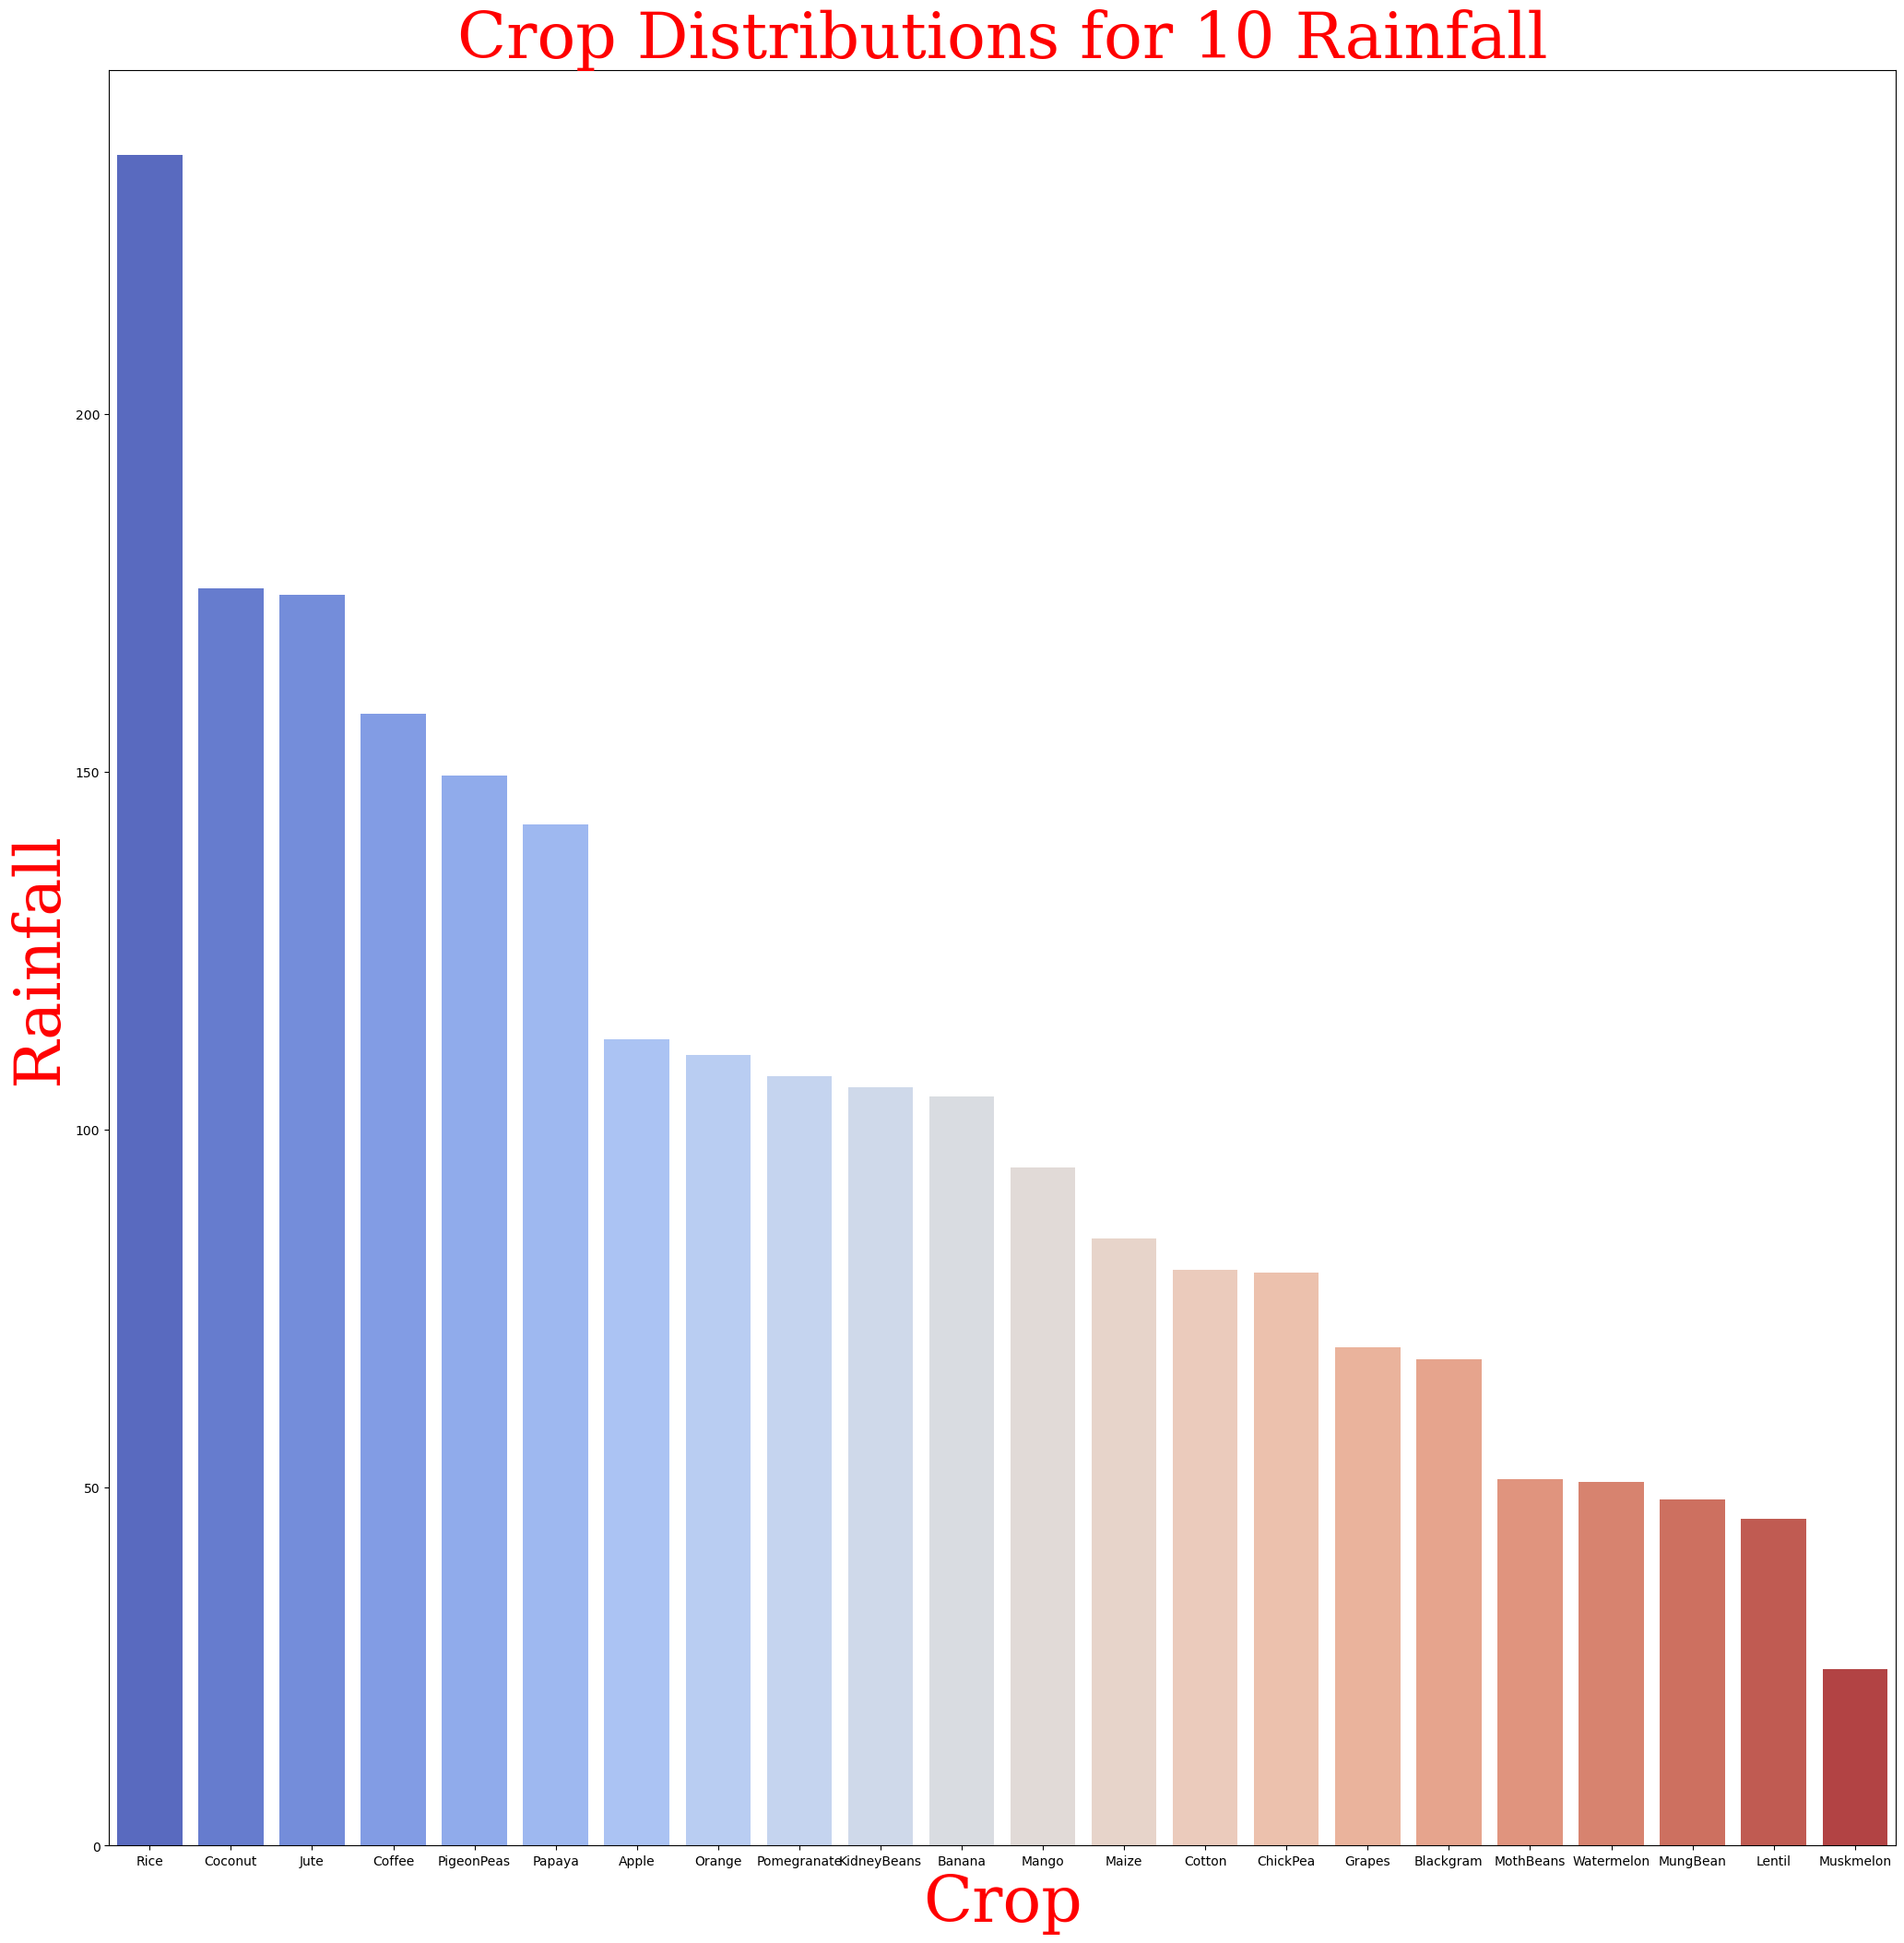

In [7]:
f={"family":"serif","size":50,"color":"r"}
top_10_Rainfall = data.groupby('Crop')['Rainfall'].mean().sort_values(ascending=False)
plt.figure(figsize=(25,25))
sns.barplot(x=top_10_Rainfall.index, y=top_10_Rainfall.values,palette='coolwarm')
plt.title('Crop Distributions for 10 Rainfall',fontdict=f)
plt.xlabel('Crop',fontdict=f)
plt.ylabel('Rainfall',fontdict=f)

In [8]:
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,37,38,361,1234,1211,2074,20
1,85,53,36,437,1085,1753,2128,20
2,60,50,39,583,1262,2117,2174,20
3,74,30,35,1279,1067,1710,2153,20
4,78,37,37,307,1201,2055,2171,20
...,...,...,...,...,...,...,...,...
2195,107,29,27,1328,763,1523,1920,5
2196,99,10,22,1442,483,666,1666,5
2197,118,28,25,789,793,1012,1895,5
2198,117,27,29,1237,387,1493,1663,5


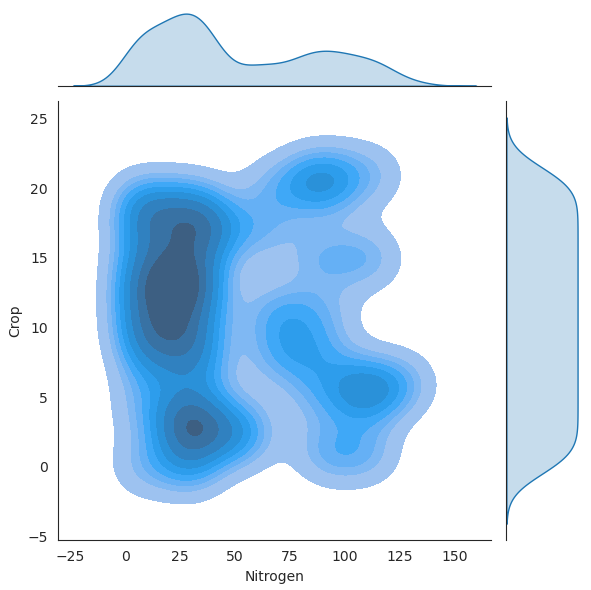

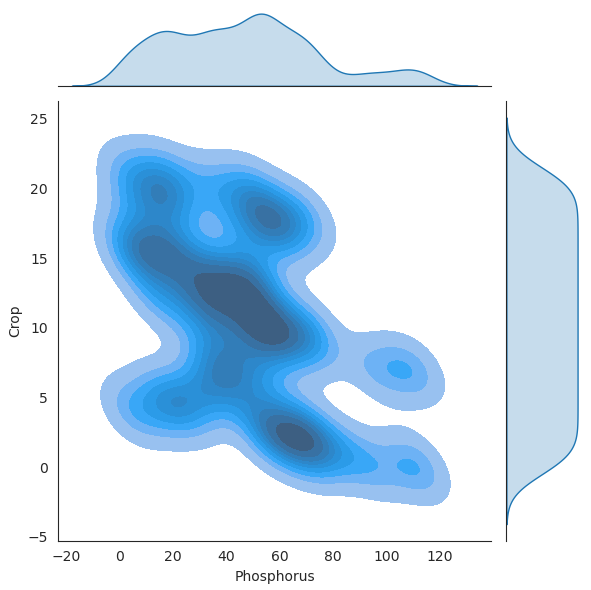

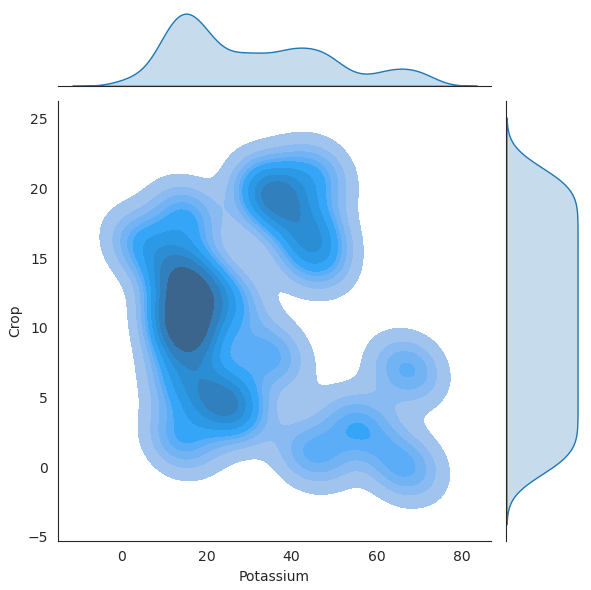

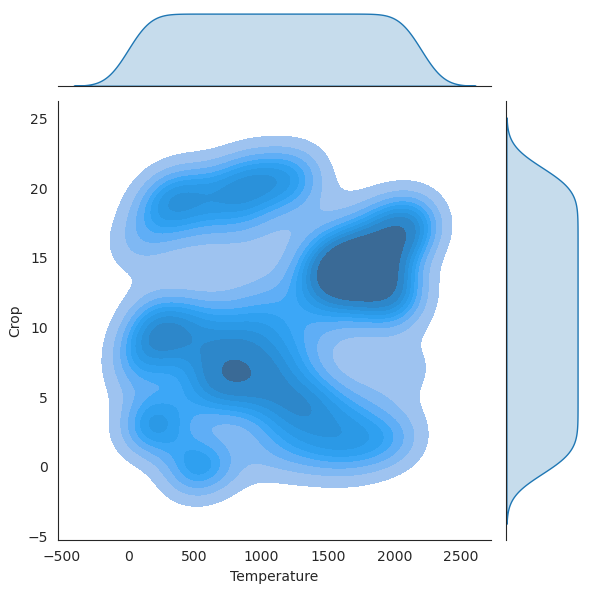

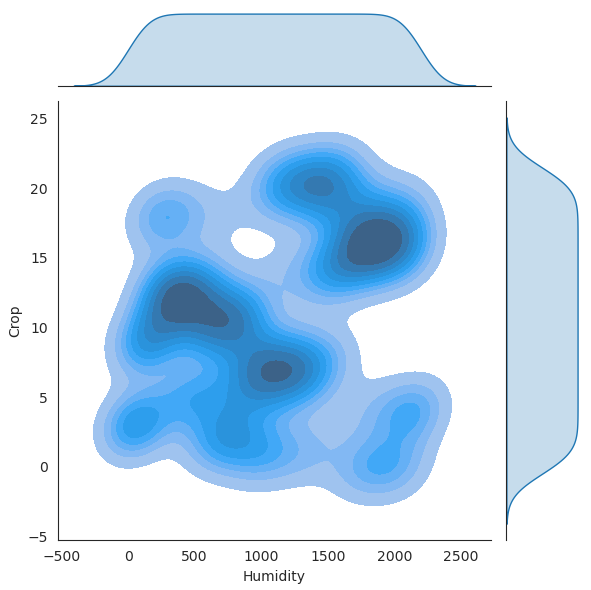

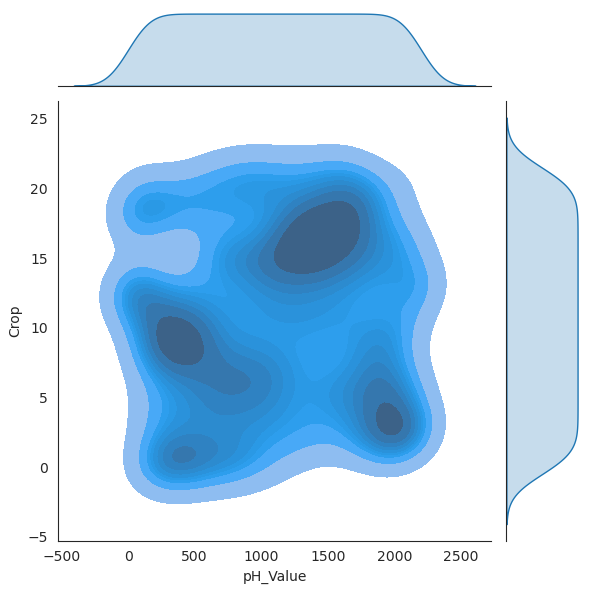

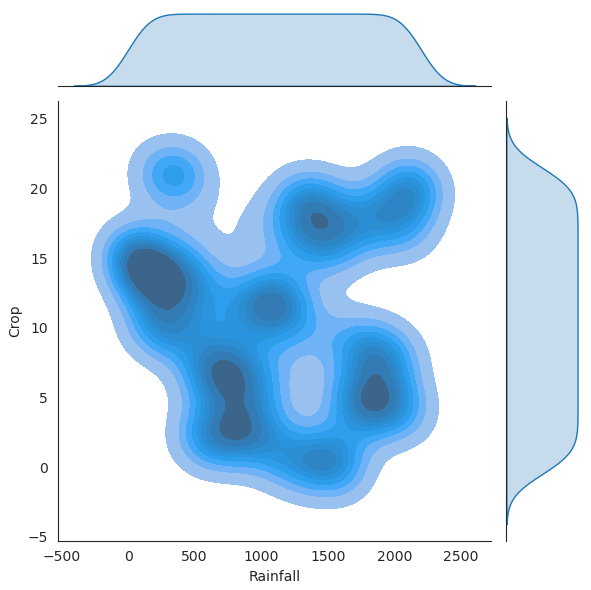

In [9]:
for col in data.select_dtypes("number"):
    if col !="Crop":
      with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["Crop"],kind="kde",fill=True)

Text(0.5, 1.0, 'Correlation_HEatmap_MAtrix')

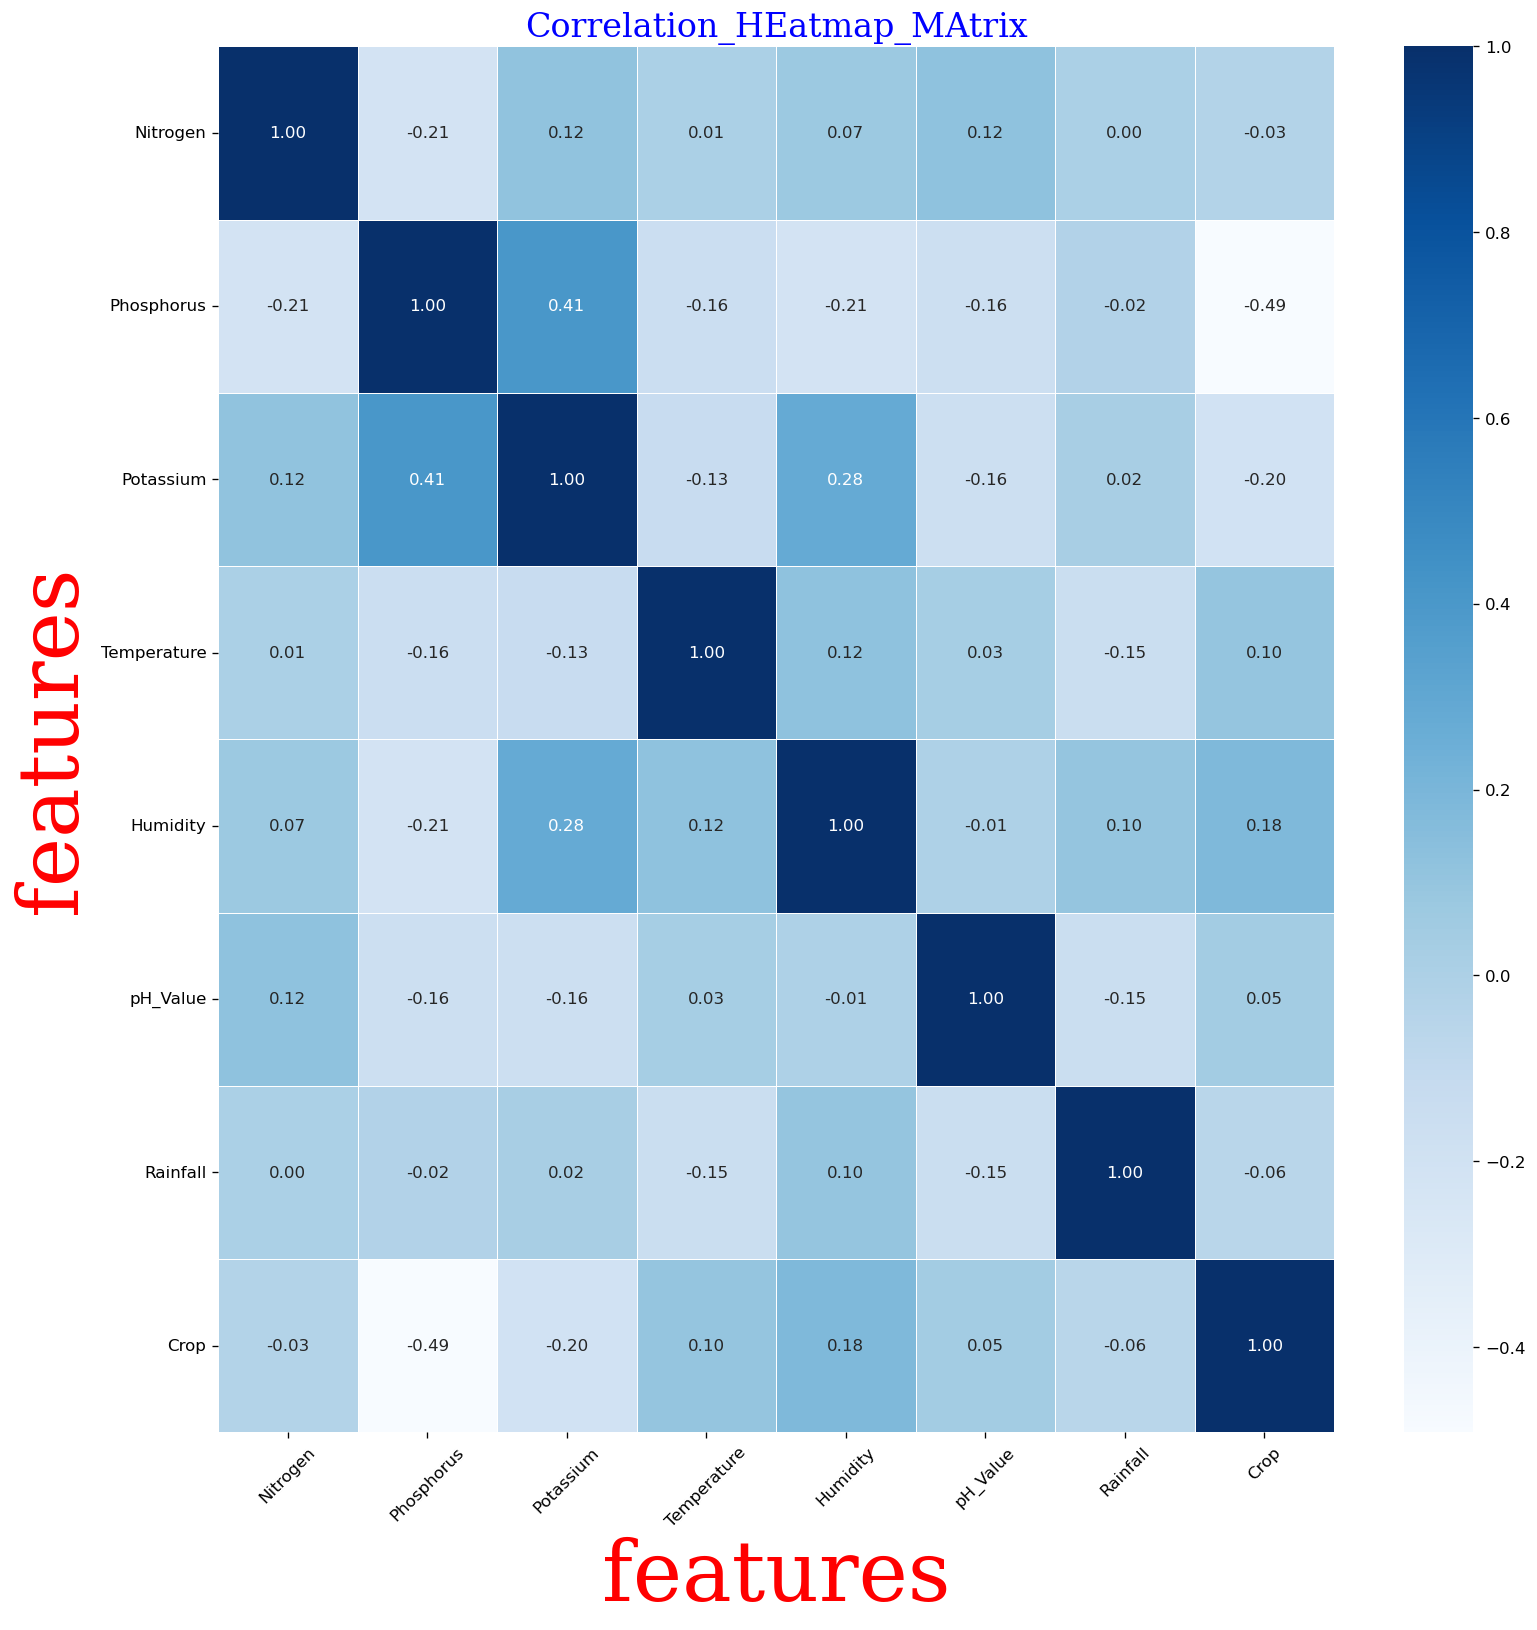

In [10]:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(15,15),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("features",fontdict=f)
plt.ylabel("features",fontdict=f)
plt.title("Correlation_HEatmap_MAtrix",fontdict=f1)

In [11]:
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Crop").select_dtypes("number").fillna(0),data["Crop"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Crop").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)


pH_Value       0.415601
Temperature    0.643380
Nitrogen       0.736466
Humidity       0.823513
Rainfall       0.871994
Potassium      1.033233
Phosphorus     1.068493
dtype: float64

In [12]:
x=data.drop(columns="Crop",axis=1)
y=data["Crop"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(y_test))

(1540, 7) (660, 7)
(1540,) (660,)


In [13]:
RC1=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)
RC1.fit(x_train,y_train)
print(f"accuracy ---->>> {RC1.score(x_test,y_test)*100:0.2f}%")

y_predict=RC1.predict(x_test)
print(np.size(y_predict))


accuracy ---->>> 98.33%
660


In [14]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

# Report:
class_report = classification_report(y_test, y_predict)
print("Classification Report:\n", class_report)

True positve prediction : 30
True Negative predicion : 30
False positve prediction: 0
False Negative prediction: 0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.88      0.97      0.92        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       0.97      1.00      0.98        30
          10       1.00      0.93      0.97        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.93      0.87      0.90        30
          14       1.00      1.00      1.00       

In [15]:
SV=svm.SVC(random_state=42,kernel="linear" )
SV.fit(x_train,y_train)
y_pred=SV.predict(x_test)
y_pred[:10]

print(f"accuracy:{metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")

print("*"*50)

cm=metrics.confusion_matrix(y_test,y_pred)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

class_report=classification_report(y_test, y_pred)
print("Classification_report --->> \n",class_report)



accuracy:98.33%
**************************************************
True positve prediction : 30
True Negative predicion : 30
False positve prediction: 0
False Negative prediction: 0
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.98        30
           2       0.86      1.00      0.92        30
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.93      0.97        30
           7       1.00      1.00      1.00        30
           8       0.91      0.97      0.94        30
           9       0.97      1.00      0.98        30
          10       1.00      1.00      1.00        30
          11       1.00      0.93      0.97        30
          12       1.00      1.00 

In [16]:
lg=LogisticRegression(random_state=42,multi_class='auto',n_jobs=-1)
lg.fit(x_train,y_train)
y_pr=lg.predict(x_test)
y_pr[:15]

print(f"accuracy:{metrics.accuracy_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

cm=metrics.confusion_matrix(y_test,y_pr)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)


print("*"*50)

class_report=classification_report(y_test, y_pr)
print("Classification_report --->> \n",class_report)


accuracy:82.42%
**************************************************
True positve prediction : 25
True Negative predicion : 30
False positve prediction: 0
False Negative prediction: 0
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.74      0.83      0.78        30
           2       0.82      0.90      0.86        30
           3       1.00      0.93      0.97        30
           4       0.94      0.97      0.95        30
           5       1.00      0.93      0.97        30
           6       0.70      0.87      0.78        30
           7       0.91      1.00      0.95        30
           8       0.59      0.57      0.58        30
           9       0.81      0.73      0.77        30
          10       0.81      0.70      0.75        30
          11       0.63      0.40      0.49        30
          12       0.97      1.00 

In [17]:

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

p=RC1.predict([[60,48,39,24.28209415,80.30025587,7.042299069,231.0863347]])
if p[0] in crop_dict:
    crop = crop_dict[p[0]]
    print("{} is a best crop to be cultivated ".format(crop))

Jute is a best crop to be cultivated 


D:\Python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Cross Validation Score (Decision Tree): [0.97402597 0.99025974 0.99350649 0.98376623 0.98051948]
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.9772727272727273
Confusion Matrix


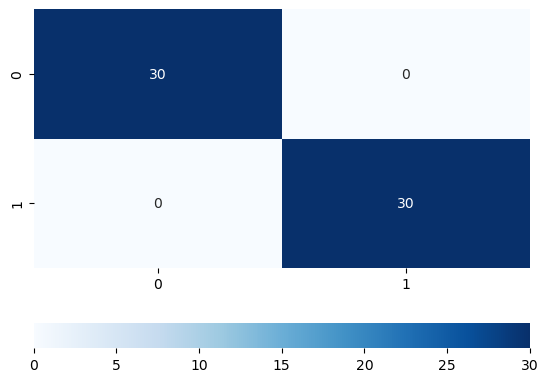

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.94      1.00      0.97        30
           2       0.97      0.97      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        30
           8       0.93      0.87      0.90        30
           9       0.97      1.00      0.98        30
          10       0.94      0.97      0.95        30
          11       0.94      1.00      0.97        30
          12       1.00      1.00      1.00        30
          13       0.96      0.90      0.93        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

score_dt = cross_val_score(model_dt, x_train, y_train, cv=5)
print("Cross Validation Score (Decision Tree):", score_dt)

train_score_dt = model_dt.score(x_train, y_train)
test_score_dt = model_dt.score(x_test, y_test)
print("Decision Tree Train Accuracy:", train_score_dt)
print("Decision Tree Test Accuracy:", test_score_dt)


y_pred_dt = model_dt.predict(x_test)
dt_acc = metrics.accuracy_score(y_pred_dt, y_test)

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_dt, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()

print(classification_report(y_test, y_pred_dt))
print('.:. Decision Tree:'+'\033[1m {:.3f}%'.format(dt_acc*100)+' .:.')


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.base import BaseEstimator,TransformerMixin

data=pd.read_csv("./Crop_Recommendation.csv")
data

data.info()


data.describe().T

for col in data:
    print(f"number of every item in---> {data[col].value_counts()}")
    print("*"*50)

f={"family":"serif","size":50,"color":"r"}
top_10_Rainfall = data.groupby('Crop')['Rainfall'].mean().sort_values(ascending=False)
plt.figure(figsize=(25,25))
sns.barplot(x=top_10_Rainfall.index, y=top_10_Rainfall.values,palette='coolwarm')
plt.title('Crop Distributions for 10 Rainfall',fontdict=f)
plt.xlabel('Crop',fontdict=f)
plt.ylabel('Rainfall',fontdict=f)

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data

for col in data.select_dtypes("number"):
    if col !="Crop":
      with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["Crop"],kind="kde",fill=True)

f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(15,15),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("features",fontdict=f)
plt.ylabel("features",fontdict=f)
plt.title("Correlation_HEatmap_MAtrix",fontdict=f1)

from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Crop").select_dtypes("number").fillna(0),data["Crop"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Crop").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)


x=data.drop(columns="Crop",axis=1)
y=data["Crop"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(y_test))

RC1=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)
RC1.fit(x_train,y_train)
print(f"accuracy ---->>> {RC1.score(x_test,y_test)*100:0.2f}%")

y_predict=RC1.predict(x_test)
print(np.size(y_predict))


from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

# Report:
class_report = classification_report(y_test, y_predict)
print("Classification Report:\n", class_report)

SV=svm.SVC(random_state=42,kernel="linear" )
SV.fit(x_train,y_train)
y_pred=SV.predict(x_test)
y_pred[:10]

print(f"accuracy:{metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")

print("*"*50)

cm=metrics.confusion_matrix(y_test,y_pred)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

class_report=classification_report(y_test, y_pred)
print("Classification_report --->> \n",class_report)



lg=LogisticRegression(random_state=42,multi_class='auto',n_jobs=-1)
lg.fit(x_train,y_train)
y_pr=lg.predict(x_test)
y_pr[:15]

print(f"accuracy:{metrics.accuracy_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

cm=metrics.confusion_matrix(y_test,y_pr)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)


print("*"*50)

class_report=classification_report(y_test, y_pr)
print("Classification_report --->> \n",class_report)



crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

p=RC1.predict([[60,48,39,24.28209415,80.30025587,7.042299069,231.0863347]])
if p[0] in crop_dict:
    crop = crop_dict[p[0]]
    print("{} is a best crop to be cultivated ".format(crop))


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

score_dt = cross_val_score(model_dt, x_train, y_train, cv=5)
print("Cross Validation Score (Decision Tree):", score_dt)

train_score_dt = model_dt.score(x_train, y_train)
test_score_dt = model_dt.score(x_test, y_test)
print("Decision Tree Train Accuracy:", train_score_dt)
print("Decision Tree Test Accuracy:", test_score_dt)


y_pred_dt = model_dt.predict(x_test)
dt_acc = metrics.accuracy_score(y_pred_dt, y_test)

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_dt, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()

print(classification_report(y_test, y_pred_dt))
print('.:. Decision Tree:'+'\033[1m {:.3f}%'.format(dt_acc*100)+' .:.')




